# Decision Trees and Random Forest

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [7]:
df=pd.read_csv('kyphosis.csv')

In [8]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


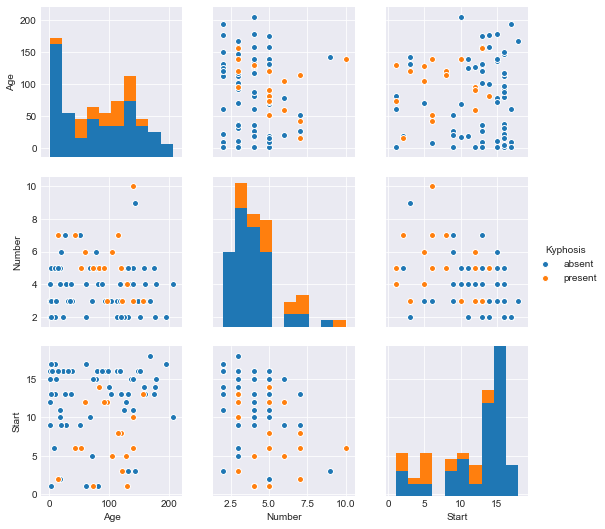

In [13]:
sns.pairplot(df,hue='Kyphosis')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=df.drop('Kyphosis',axis=1)

In [16]:
y=df['Kyphosis']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree=DecisionTreeClassifier()

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
predictions=dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[16  4]
 [ 2  3]]


             precision    recall  f1-score   support

     absent       0.89      0.80      0.84        20
    present       0.43      0.60      0.50         5

avg / total       0.80      0.76      0.77        25



In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc=RandomForestClassifier(n_estimators=200)  # the number of the trees

In [26]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
rfc_pred=rfc.predict(X_test)

In [30]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[20  0]
 [ 3  2]]


             precision    recall  f1-score   support

     absent       0.87      1.00      0.93        20
    present       1.00      0.40      0.57         5

avg / total       0.90      0.88      0.86        25



In [31]:
df['Kyphosis'].value_counts()  # inbalanced dataset

absent     64
present    17
Name: Kyphosis, dtype: int64

In [ ]:
# pip install pydot
# graphviz library
# www.graphviz.org -> download -> windows ->need to set up a path variable
